### Introduction  
This is my report on the case study I conducted on Cyclistic, a fictional bike-share company. First, let us identify the important details on this study.

#### About the Company  
Cyclistic is a fictional company which features more than 5,800 bicycles and 600 docking stations around Chicago. They offer recycling bikes, hand tricycles and cargo bikes to include people requiring assistive features which make up about 8% of the users, while about 30% commute to work everyday and the rest most likely ride for leisure. Customers who purchase single-ride or full-day passes are called casual riders while those who purchase annual memberships are called members.

#### Problem  
Identify the differences in bike usage between casual riders and members in order to make casual riders subscribe for annual memberships, and to determine how the company could use digital media to influence casual riders to become annual members. (Although I was only assigned to answer the first question, let’s try to answer them all).

#### Business Task  
Design marketing strategies aimed at converting casual riders into annual members.

#### Stakeholders  
The executive team, Lily Moreno (director of marketing and my manager) and Cyclistic marketing analytics team.

#### Deliverables  
Report on the following:   
1. A clear statement of the business task 
2. A description of all data sources used 
3. Documentation of any cleaning or manipulation of data 
4. A summary of analysis 
5. Supporting visualizations and key findings
6. Top three recommendations based on analysis

#### Data sources and reliability  
There were 2 csv files downloaded from the case study document containing datasets on the first quarters of 2019 and 2020 which were made available by Motivate International Inc., a primary source under a license issued by the City of Chicago.  No riders’ identifiable information was disclosed to secure data privacy. 

The 2019 dataset originally had 12 columns and 365,070 rows while the 2020 had 13 columns and 426,888 rows. 

#### Data cleaning and consistency  
To avoid frequent crashes during the cleaning, analysis and visualization processes in Rstudio, I initially cleaned the datasets in Excel to reduce the big amount of data to be imported in R. 

I have chosen Excel because it is the easiest platform for me to clean data and the data sets are not beyond the limit. I have also chosen R because of its convenience in importing, analysis and visualization of data.

First, I ensured that there were no duplicates. The missing data were all addressed later after deleting unworkable columns, details of which are found below. I also checked for possible biases and saw none. 

The following columns were deleted:    
* from 2019: gender and birthyear columns because they were excluded by the company in 2020
* from 2020: start_lat, start_long, end_lat and end_long columns because they were new additions and did not exist in 2019
* from 2020: all "HQ QR"" or <0 values from start_station_name column because they were already removed by the company. 
* from both: bikeid and rideable_type because of bikeid’s unidentifiable values inconsistent with the other, thus rendering them unworkable together
* from both: from_station_id, to_station_id, start_station_id, end_station_id to reduce amount of data since I wouldn’t be working on them

#### Further data cleaning  
After importing the datasets in Rstudio, the following cleaning processes were performed to make all columns from both datasets consistent before merging them together:
*renaming columns 
*reformatting columns
*replacing value names

#### Assumption  
I assumed that there was no customer segregation other than members and casual riders.



In [1]:
install.packages("tidyverse")
library(tidyverse)
install.packages("ggthemes")
library(ggthemes)
library(scales)
library(knitr)
library(rmarkdown)
library(yaml)
library(conflicted)
conflict_prefer("filter","dplyr")
conflict_prefer("lag","dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [2]:
q1_2020 <- read_csv("../input/divvy-2020-csv/divvy_2020.csv")

Rows: 423120 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): ride_id, started_at, ended_at, start_station_name, end_station_name...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
q1_2019 <- read_csv("../input/divvy-2019-csv/divvy_2019.csv")

Rows: 365069 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): start_time, end_time, from_station_name, to_station_name, usertype
dbl (1): trip_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#Rename column names in q1_2019 to make them consistent with q1_2020
(q1_2019<-rename(q1_2019, 
    ride_id=trip_id,
    started_at=start_time,
    ended_at=end_time,
    start_station_name=from_station_name,
    end_station_name=to_station_name,
    member_casual=usertype))

ride_id,started_at,ended_at,start_station_name,end_station_name,member_casual
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
21742443,2019/01/01 0:04,2019/01/01 0:11,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019/01/01 0:08,2019/01/01 0:15,State St & Randolph St,Dearborn St & Van Buren St (*),Subscriber
21742445,2019/01/01 0:13,2019/01/01 0:27,Racine Ave & 18th St,Western Ave & Fillmore St (*),Subscriber
21742446,2019/01/01 0:13,2019/01/01 0:43,California Ave & Milwaukee Ave,Clark St & Elm St,Subscriber
21742447,2019/01/01 0:14,2019/01/01 0:20,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,Subscriber
21742448,2019/01/01 0:15,2019/01/01 0:19,LaSalle St & Washington St,Dearborn St & Monroe St,Subscriber
21742449,2019/01/01 0:16,2019/01/01 0:19,LaSalle St & Washington St,Dearborn St & Monroe St,Subscriber
21742450,2019/01/01 0:18,2019/01/01 0:20,St. Clair St & Erie St,McClurg Ct & Erie St,Subscriber
21742451,2019/01/01 0:18,2019/01/01 0:47,Fort Dearborn Dr & 31st St,State St & 33rd St,Subscriber


In [5]:
#Change numeric format of ride_id column into character format for consistency
q1_2019<-mutate(q1_2019, 
    ride_id=as.character(ride_id))

In [6]:
#Merge 2 data frames
q1_trips<-bind_rows(q1_2019,q1_2020)

In [7]:
#Inspect statistical summary of q1_trips
summary(q1_trips)

   ride_id           started_at          ended_at         start_station_name
 Length:788189      Length:788189      Length:788189      Length:788189     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 end_station_name   member_casual     
 Length:788189      Length:788189     
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [8]:
#Replace value names for consistency
q1_trips<-q1_trips %>% 
  mutate(member_casual=recode(member_casual,
  "Subscriber"="member",
  "Customer"="casual"))

In [9]:
#Calculate trips in seconds
q1_trips$ride_duration <- difftime(q1_trips$ended_at,
  q1_trips$started_at)

In [10]:
#reformat ride_duration column from character to numeric for more calculations
q1_trips$ride_duration <- as.numeric(as.character(
  q1_trips$ride_duration))

In [11]:
#Create new date columns for analysis
q1_trips$date<-as.Date(q1_trips$started_at)
q1_trips$month<-format(as.Date(q1_trips$date), "%b")
q1_trips$day<-format(as.Date(q1_trips$date), "%d")
q1_trips$year<-format(as.Date(q1_trips$date), "%Y")
q1_trips$week_day<-format(as.Date(q1_trips$date), "%a")


In [12]:
#Examine data frame with new columns
glimpse(q1_trips)

Rows: 788,189
Columns: 12
$ ride_id            <chr> "21742443", "21742444", "21742445", "21742446", "21…
$ started_at         <chr> "2019/01/01 0:04", "2019/01/01 0:08", "2019/01/01 0…
$ ended_at           <chr> "2019/01/01 0:11", "2019/01/01 0:15", "2019/01/01 0…
$ start_station_name <chr> "Wabash Ave & Grand Ave", "State St & Randolph St",…
$ end_station_name   <chr> "Milwaukee Ave & Grand Ave", "Dearborn St & Van Bur…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ ride_duration      <dbl> 420, 420, 840, 1800, 360, 240, 180, 120, 1740, 300,…
$ date               <date> 2019-01-01, 2019-01-01, 2019-01-01, 2019-01-01, 20…
$ month              <chr> "Jan", "Jan", "Jan", "Jan", "Jan", "Jan", "Jan", "J…
$ day                <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01…
$ year               <chr> "2019", "2019", "2019", "2019", "2019", "2019", "20…
$ week_day           <chr> "Tue", "Tue", "Tue", "Tue", "Tue", "Tue", "Tue", "T…


In [13]:
#check combined ride information of the first quarters
q1_trips %>% group_by(member_casual) %>% 
  summarise(number_of_rides= n(), 
  average_duration=mean(ride_duration)) %>% 
  arrange(member_casual)

member_casual,number_of_rides,average_duration
<chr>,<int>,<dbl>
casual,67877,5372.7628
member,720312,795.2308


In [14]:
#Inspect descriptive analysis on ride durations
q1_trips %>% group_by(member_casual) %>% 
  summarise(average_duration=mean(ride_duration), 
  median_duration=median(ride_duration),
  max_duration=max(ride_duration),
  min_duration=min(ride_duration)) %>% 
  arrange(member_casual)

member_casual,average_duration,median_duration,max_duration,min_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,5372.7628,1380,10632000,0
member,795.2308,480,6096420,0


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


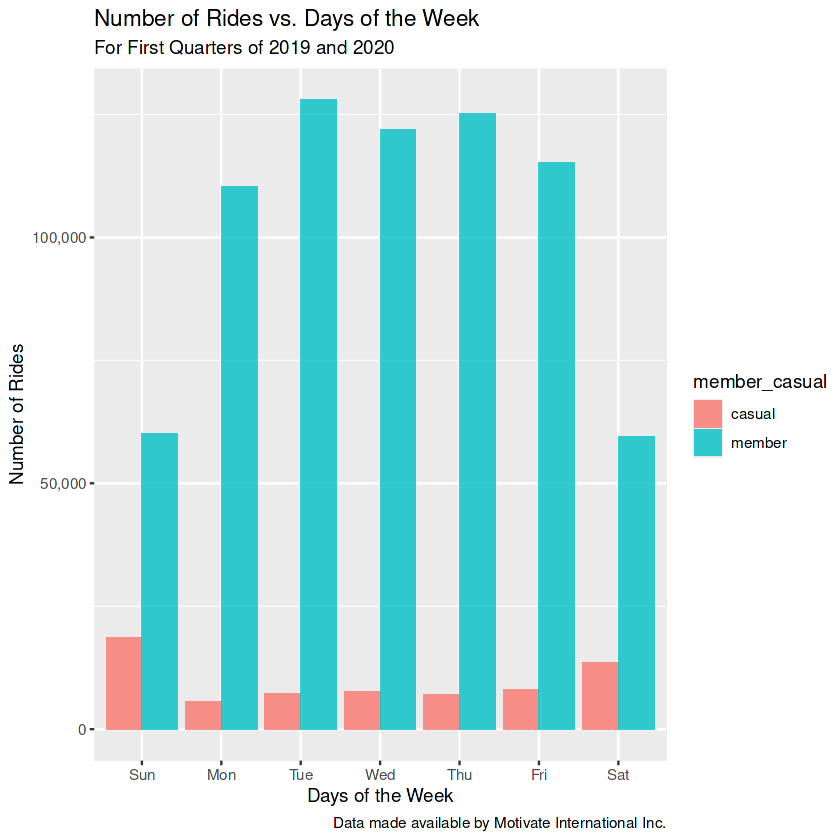

In [15]:
#Plot the number of rides against days of the week
q1_trips %>% mutate(week_day = factor(week_day, 
  levels = c("Sun","Mon","Tue","Wed","Thu","Fri", "Sat"))) %>% 
  group_by(member_casual, week_day) %>% 
  summarise(number_of_rides=n()) %>% 
  ggplot(aes(x=week_day, y=number_of_rides, fill=member_casual))+ 
  scale_y_continuous(labels = comma) + 
  geom_col(alpha=0.8, position = "dodge") +
  labs (x="Days of the Week", y= "Number of Rides", 
        title = "Number of Rides vs. Days of the Week", 
        subtitle = "For First Quarters of 2019 and 2020",
        caption = "Data made available by Motivate International Inc.")

#### Observations  
We could see the big difference in the number of members against casual riders everyday during the combined quarters of 2019 and 2020. 

Members have higher numbers riding the bikes during weekdays but these numbers drop significantly during weekends, which indicates that riders use them to go to work and probably to school. Casuals with very low numbers rode the bikes more during weekends for leisure and sports. 

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


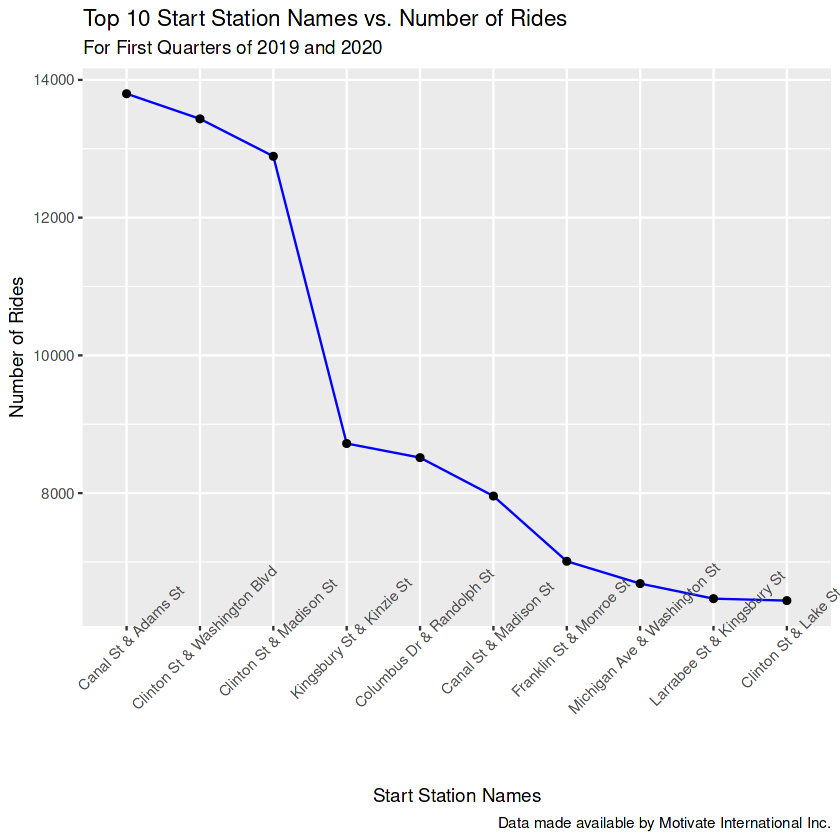

In [16]:
#Plot top 10 ride stations
q1_trips %>% group_by(start_station_name, member_casual) %>% 
  summarise(number_of_rides=n()) %>% 
  arrange(number_of_rides) %>% tail(10) %>% 
  ggplot(aes(fct_reorder(start_station_name, -number_of_rides), 
  y=number_of_rides)) + geom_line(color="blue", 
  size=0.5, group=1)+ geom_point()+
  theme(axis.text.x = element_text(angle = 45)) +
  labs (x="Start Station Names", y= "Number of Rides", 
  title = "Top 10 Start Station Names vs. Number of Rides", 
  subtitle = "For First Quarters of 2019 and 2020",
  caption = "Data made available by Motivate International Inc.")

#### Observations  
We could see the top 10 stations where riders usually start their trips. The search result in Google Map shows that the top 10 stations are located in the northeast part of Chicago around the business districts near the train or subway stations. Two of them are also next to the parks and one is close to condominiums and residential homes.

In [17]:
#Ride information by year
yearly_trips<- q1_trips %>% 
  group_by(member_casual, year) %>% 
  mutate(number_of_rides = n(), 
  average_ride_duration = mean (ride_duration)) %>% 
  select(member_casual, year, average_ride_duration, 
  number_of_rides)


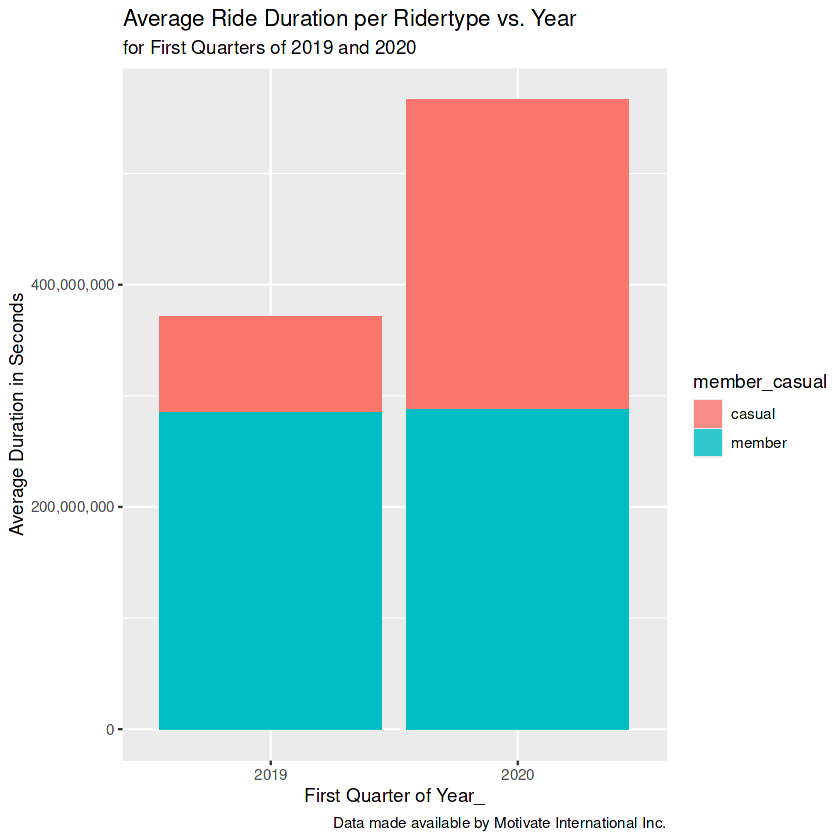

In [18]:
#Compare average duration of rides per year}
yearly_trips %>%  
  group_by(member_casual) %>% 
  mutate(ROC_average_ride_duration = 100* (
  average_ride_duration - lag(average_ride_duration))/lag(average_ride_duration)) %>% 
  select(member_casual, year, average_ride_duration, ROC_average_ride_duration) %>%  
  ggplot(aes(x= year, y=average_ride_duration, 
  fill = member_casual)) + geom_col(alpha=0.8) + 
  scale_y_continuous(labels = comma)+
  labs(x="First Quarter of Year_", 
  y="Average Duration in Seconds",
  title="Average Ride Duration per Ridertype vs. Year", 
  subtitle = "for First Quarters of 2019 and 2020",
  caption = "Data made available by Motivate International Inc.")

#### Observation  
Although there was a big difference in the numbers of average ride durations between members and casuals in 2019, members had only a slight increase from 2019 to 2020 while casuals had a high increase.

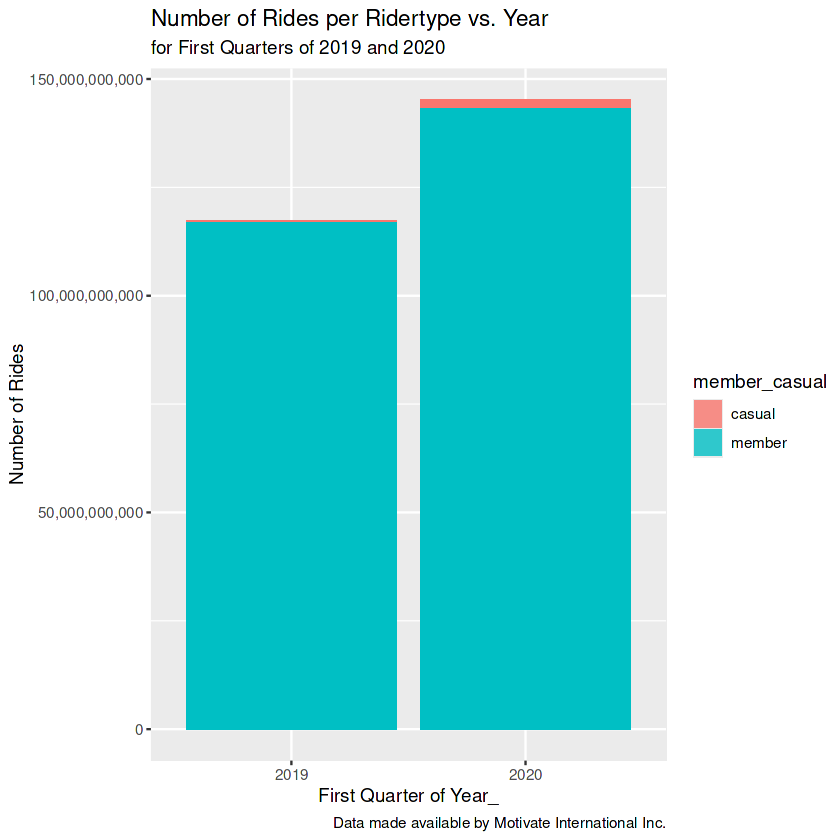

In [19]:
#Compare the number of rides per year
yearly_trips %>%  
  group_by(member_casual) %>% 
  mutate(ROC_number_of_rides= 100* (
    number_of_rides- lag(number_of_rides))/lag(number_of_rides))%>% 
  select(member_casual, year, number_of_rides, ROC_number_of_rides) %>%  
  ggplot(aes(x= year, y=number_of_rides, 
  fill = member_casual)) + geom_col(alpha=0.8) + 
  scale_y_continuous(labels = comma)+
  labs(x="First Quarter of Year_", 
       y="Number of Rides",
       title="Number of Rides per Ridertype vs. Year", 
       subtitle = "for First Quarters of 2019 and 2020",
       caption = "Data made available by Motivate International Inc.")


#### Observations  
The chart shows the high number of rides for members compared to the very low numbers for casuals. It also shows a big rise for members from 2019 to 2020, while only a slight increase for casuals.

In [20]:
#Monthly ride information
monthly_trips<- q1_trips %>% 
  mutate(month = factor(month, levels = c("Jan","Feb","Mar"))) %>% 
  group_by(member_casual, year, month) %>% 
  summarise(number_of_rides = n(), 
  average_monthly_duration = mean (ride_duration)) %>% 
  mutate(ROC_monthly_ride_number = 100* (
  number_of_rides-lag(number_of_rides))/lag(number_of_rides)) %>% 
  select(member_casual, year, month, average_monthly_duration, 
  number_of_rides, ROC_monthly_ride_number)

`summarise()` has grouped output by 'member_casual', 'year'. You can override
using the `.groups` argument.


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_col()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`).”


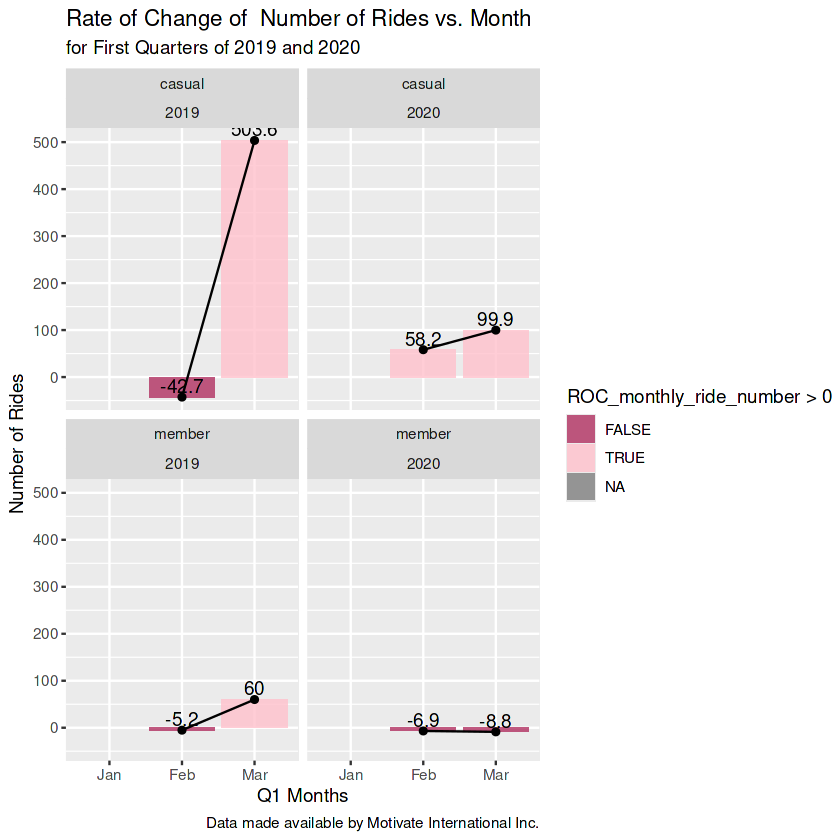

In [21]:
#Plot the rate of change on number of rides
monthly_trips %>% 
  mutate(month = factor(month, levels = c("Jan","Feb","Mar"))) %>% 
  select(member_casual, year, month, number_of_rides, 
  ROC_monthly_ride_number) %>% 
  ggplot() + 
  geom_col(aes(x= month, y=ROC_monthly_ride_number, 
  fill=ROC_monthly_ride_number>0), alpha=0.8)+ 
  facet_wrap(member_casual~year)+
  scale_fill_manual(values = c("maroon","pink"))+
  geom_line(aes(x= month, y= ROC_monthly_ride_number, group=1)) + 
  geom_point(aes(x= month, y=ROC_monthly_ride_number))+
  geom_text(aes(x=month, y= ROC_monthly_ride_number, 
  label = round(ROC_monthly_ride_number,1), vjust=-0.3)) +
  labs(x="Q1 Months", y="Number of Rides", 
  title="Rate of Change of  Number of Rides vs. Month", 
  subtitle = "for First Quarters of 2019 and 2020",
  caption = "Data made available by Motivate International Inc.") 

#### Observations  
Let us see the rate of change of ride numbers by users for the first 3 months of each year.

The first months are not reflected in the graph since they are the first point of reference to determine the rate of change in the next months.

The chart shows that casuals had a percentage change of -42.7 jumping to 503.6 from January to March 2019, and in 2020 from 58.2 up to 99.9. Members had a percentage change of -5.2 then up to 60  in the first 3 months of 2019, and in 2020 from -6.9 down to -8.8.


### Conclusions and recommendations:

The datasets only covered the first quarters of 2019 and 2020 so the data available is not conclusive especially on seasonal changes. Nevertheless, the data is enough to study riders' behaviour.

Members tend to use bikes during weekdays to and from work while casual riders tend to ride longer during weekends for leisure and sport.

The average ride duration for casual riders increased significantly from 2019 to 2020. This indicates a positive signal from the casual riders because even the cold weather in winter couldn’t stop them from biking longer.

Moreover, the high increase in rides for casuals in both years confirms that more riders consider biking as a worthy investment of time and money. Casual riders should be convinced by illustrating how much money they could save in annual subscriptions if they ride everyday. It should also be emphasized how shorter and more frequent rides would be beneficial to health, economic and environmental conditions. 

Alternatively, the company could create a new membership scheme offering cheaper or longer ride time for weekend riders. This would be convenient for casual riders since they could use the bikes with less hassle and lower price, and enjoy members’ privileges. 

Another recommendation is proper segmentation of users based on demographics focusing on casual riders to identify actual needs and risk factors. Through segmentation the company could target the right prospects and improve services and customer satisfaction. 

To avoid unavailability of bikes on peak times, the company should monitor peak hours and seasons so they could transfer and make available the bikes needed in every station. I also suggest that more docks should be installed if required in most popular stations. 

For digital marketing strategy, the company could connect with relevant media sources and influencers from the industries of interest like sports, transportation and leisure to target precise audiences and engage online users. This type of marketing is cost-effective and could reach millions of online users. The company could give special offers or discounts through these influencers to convince more viewers participation.

#### Appendix  
https://divvybikes.com/, https://www.shopify.com/blog/influencers-drive-sales, https://dutchreview.com/featured/rent-a-bicycle-in-the-netherlands-your-guide-on-how-to-get-started/, https://www.sciencedirect.com/science/article/abs/pii/S2210670719312387, and https://link.springer.com/article/10.1007/s13132-023-01417-3